In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# **Task: The 10 amplifiers**

The task is to visualize the similarities or differences of 10 amplifiers, which were designed to be identical. By using the data from the measurements, the amplification curves can be plotted to get a first impression. To remain consistent, I will use the file names as labels for the belonging curves every time. The following plot just shows the 10 curves again but with labels for each amplifier.  

**Idea:** 

Every curve has a similar shape. For this reason, I choose the height (the amplification magnitudes) as a measure of the differences or similarities. First, an average curve will be calculated by taking the 10 amplification values for each frequency. The standard deviation will also be calculated and shown as a region above and under the average curve. A second plot will show only the height differences. In order to visualize this, the average of all amplification values for each of the 10 curves will be calculated, so that there are 10 different average values in total. The mean height of these 10 values will also be shown to compare how different or similar they are. 

In [2]:
all_files = os.listdir('Data')
all_files.remove('.ipynb_checkpoints')

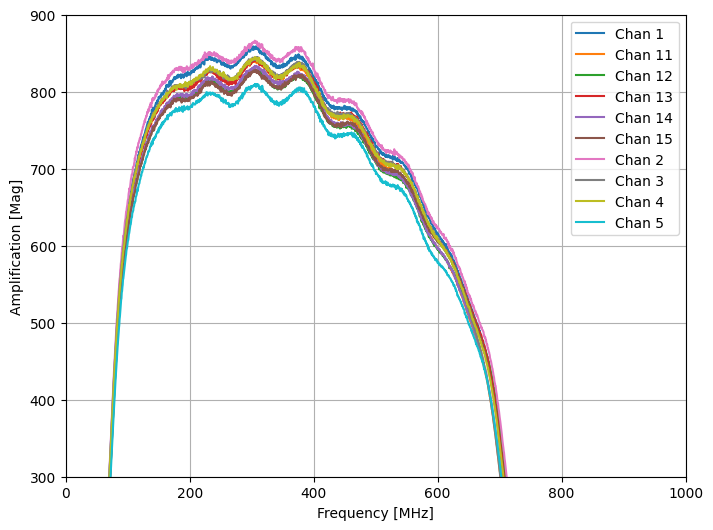

In [26]:
plt.figure(figsize=(8, 6))


for one_file in all_files:
    data = np.loadtxt(os.path.join('Data', one_file),skiprows=7,delimiter=',')
    if one_file[6] == '.':
        chan = f'Chan {one_file[5:6]}'
    else:
        chan = f'Chan {one_file[5:7]}'
    plt.plot(data[:,0]/1e6,data[:,5], label = chan)
    plt.legend(loc = 'upper right')

plt.xlabel('Frequency [MHz]')
plt.ylabel('Amplification [Mag]')

plt.ylim(300, 900)
plt.xlim(0,1000)
plt.grid()
plt.savefig('amplifier_data.png')

### **Step 1:** Average curve

In [4]:
av_curve = []

for i in range(2001): 
    S = 0               
    for one_file in all_files:
        data_S = np.loadtxt(os.path.join('Data', one_file),skiprows=7,delimiter=',')
        S += data_S[i,5]   
    M = S/10               
    av_curve.append(M)
    
print("length (just to check): ",len(av_curve))

length (just to check):  2001


### **Step 2:** Standard deviation

In [6]:
var = []
for i in range(2001): 
    V= 0               
    for one_file in all_files:
        data_v = np.loadtxt(os.path.join('Data', one_file),skiprows=7,delimiter=',')
        Diff = (data_v[i,5] - av_curve[i])**(2)
        
        V += Diff   
    Std = (V/9)**0.5               
    var.append(Std)
print("length: ",len(var))
print("Max deviation: " +str(round(np.max(var),2)))

length:  2001
Max deviation: 25.53


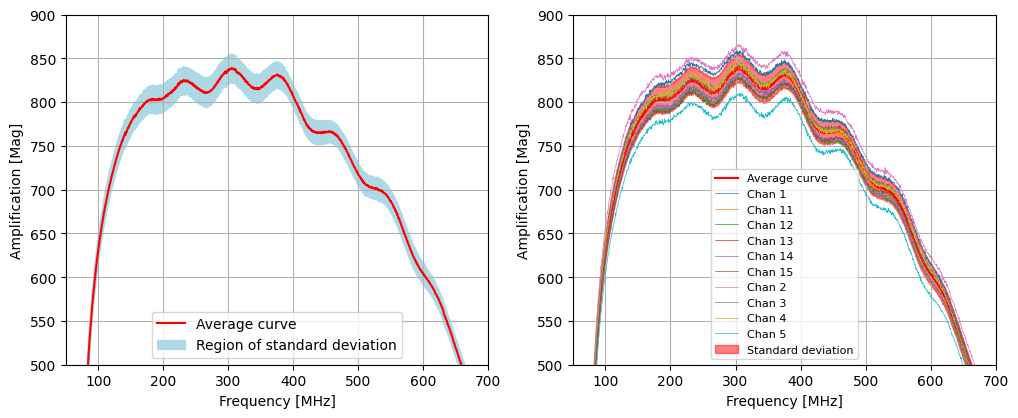

In [101]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)

plt.plot(data[:,0]/1e6, av_curve, label = 'Average curve', color = 'red')

plt.fill_between(data[:,0]/1e6, 
                 np.array(av_curve) + np.array(var), np.array(av_curve) - np.array(var), 
                 color = 'lightblue',  
                 label = 'Region of standard deviation') 


plt.xlabel('Frequency [MHz]')
plt.ylabel('Amplification [Mag]')
plt.legend(loc = 'lower center')
plt.grid()
plt.xlim(50,700)
plt.ylim(500, 900)

plt.subplot(2, 2, 2)


plt.plot(data[:,0]/1e6, av_curve, label = 'Average curve', color = 'red')

    
for one_file in all_files:
    data = np.loadtxt(os.path.join('Data', one_file),skiprows=7,delimiter=',')
    if one_file[6] == '.':
        chan = f'Chan {one_file[5:6]}'
    else:
        chan = f'Chan {one_file[5:7]}'
    plt.plot(data[:,0]/1e6,data[:,5], alpha = 1, linewidth = 0.5, label= chan)
 
plt.fill_between(data[:,0]/1e6, 
                 np.array(av_curve) + np.array(var), np.array(av_curve) - np.array(var),
                 color = 'red', alpha = 0.5, label = 'Standard deviation') 


plt.xlabel('Frequency [MHz]')
plt.ylabel('Amplification [Mag]')

plt.legend(loc = 'lower center', fontsize= 8) 
plt.grid()
plt.xlim(50,700)
plt.ylim(500, 900)
plt.savefig('Average_Std.png')

With the help of the plot in the right panel, the outliers are visible. Chan 1, 2 and 5 are outside of the region of standard deviation. For the result, the average curve with the region of standard deviation and the three outliers will be plotted:

(400.0, 900.0)

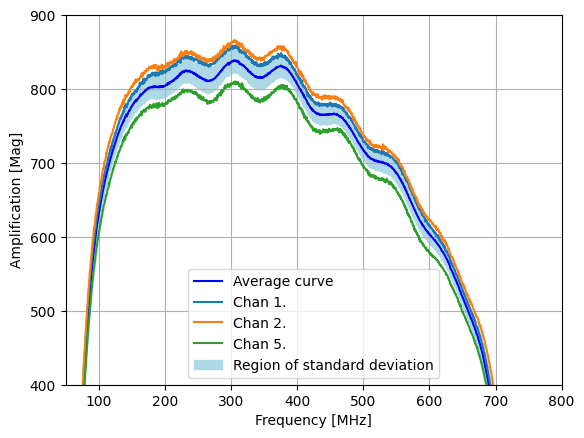

In [12]:
outlier = [all_files[0],all_files[6],all_files[9]]
plt.plot(data[:,0]/1e6, av_curve, label = 'Average curve', color = 'blue')


for one_file in outlier:
    data = np.loadtxt(os.path.join('Data', one_file),skiprows=7,delimiter=',')
    plt.plot(data[:,0]/1e6,data[:,5], alpha = 1, label = f'Chan {one_file[5:7]}')


plt.fill_between(data[:,0]/1e6, # Specify the x-array to refere to
                 np.array(av_curve) + np.array(var), np.array(av_curve) - np.array(var), 
                 color = 'lightblue',  
                 label = 'Region of standard deviation')


plt.xlabel('Frequency [MHz]')
plt.ylabel('Amplification [Mag]')
plt.legend(loc = 'lower center')
plt.grid()
plt.xlim(50,800)
plt.ylim(400, 900)

### **Step 3:** Average height of each curve

In [13]:
av_height = []
for one_file in all_files:
    H = 0
    data_h = np.loadtxt(os.path.join('Data', one_file),skiprows=7,delimiter=',')
    for i in range(2001):
        H += data_h[i,5]
    A = H/2001
    av_height.append(A)

### **Final result:** 
The first plot will show each average height for the single curves and the mean value of the 10 different heights for the comparison. The second plot will show the average curve of the 10 curves with the region of standard deviation and the three curves Chan 1, 2 and 5 which are deviating significantly from the average curve. 

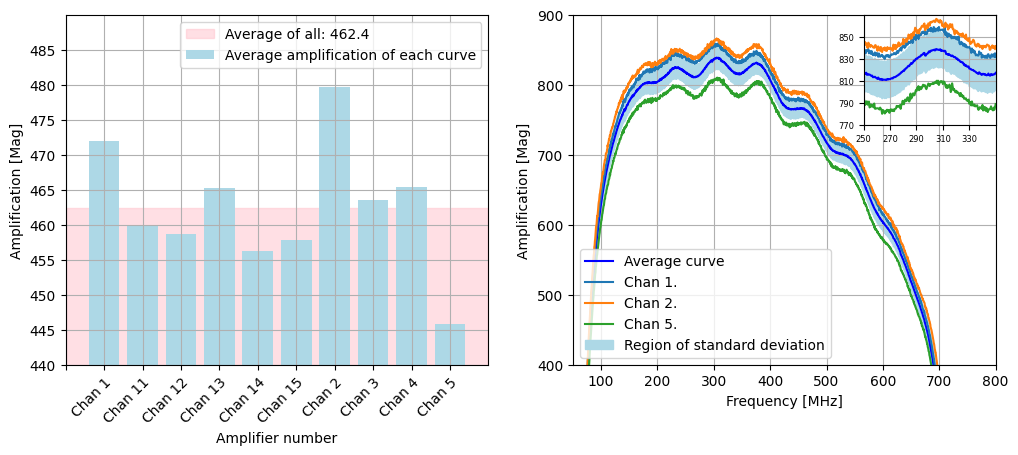

In [98]:
plt.figure(figsize = (12,10))
plt.subplot(2, 2, 1)

x = [1,2,3,4,5,6,7,8,9,10]
y = av_height
mean = sum(av_height)/10
plt.fill_between([0,1,2,3,4,5,6,7,8,9,10,11], 
                 mean, 0, 
                 alpha = 0.5,                                                            
                 color = 'pink',  
                 label = f'Average of all: {round(mean,2)}') 
plt.bar(x, y,label = 'Average amplification of each curve', color = 'lightblue')

plt.legend()
plt.grid()
plt.ylim(440,490)

plt.xlabel('Amplifier number')
plt.ylabel('Amplification [Mag]')
x_ticks_labels = ['','Chan 1','Chan 11','Chan 12','Chan 13', 'Chan 14','Chan 15','Chan 2','Chan 3','Chan 4','Chan 5']
plt.yticks(np.arange(440,490, 5))
plt.xticks(
    np.arange(11),
    x_ticks_labels,
    rotation=45,
    rotation_mode='anchor',
    horizontalalignment='right',  
    verticalalignment='top',    
);
plt.xlim(0,11)



plt.subplot(2, 2, 2)

plt.plot(data[:,0]/1e6, av_curve, label = 'Average curve', color = 'blue')


for one_file in outlier:
    data = np.loadtxt(os.path.join('Data', one_file),skiprows=7,delimiter=',')
    plt.plot(data[:,0]/1e6,data[:,5], alpha = 1, label = f'Chan {one_file[5:7]}')


plt.fill_between(data[:,0]/1e6, 
                 np.array(av_curve) + np.array(var), np.array(av_curve) - np.array(var),
                 color = 'lightblue',  
                 label = 'Region of standard deviation')


plt.xlabel('Frequency [MHz]')
plt.ylabel('Amplification [Mag]')
plt.legend(loc = 'lower left')
plt.grid()
plt.xlim(50,800)
plt.ylim(400, 900)


plt.axes([0.79, 0.77, 0.11, 0.11])

plt.plot(data[:,0]/1e6, av_curve,  color = 'blue')


for one_file in outlier:
    data = np.loadtxt(os.path.join('Data', one_file),skiprows=7,delimiter=',')
    plt.plot(data[:,0]/1e6,data[:,5], alpha = 1, label = f'Chan {one_file[5:7]}')


plt.fill_between(data[:,0]/1e6, 
                 np.array(av_curve) + np.array(var), np.array(av_curve) - np.array(var), 
                                                                            
                 color = 'lightblue',  
                 label = 'Region of standard deviation')

major_xticks = np.arange(250,350, 20)
major_yticks = np.arange(770, 870, 20)
plt.grid()
plt.xlim(250,350)
plt.ylim(770, 870)
plt.yticks(major_yticks, fontsize=6)
plt.xticks(major_xticks, fontsize=6)

plt.savefig('exercise_mm_school.png')

**Conclusion:**
Comparing the plots, we see how the curves of Chan 1, Chan 2 and Chan 5 differ from the other curves and the average curve. Looking at the peaks, the region of standard deviation could be guessed around $\pm$ 20. As seen before, all the other curves are roughly inside this region which shows in which measure they are similar to each other. 

### Standard deviation without Chan 1, Chan 2 and Chan 5

This is not important for my solution anymore but just to see how big the standard deviation would be without Chan1, Chan 2 and Chan 5

In [103]:
av_curve_2 = []
without_125 = [all_files[1],all_files[2],all_files[3],all_files[4],all_files[5],all_files[7],all_files[8]]
for i in range(2001): 
    S = 0               
    for one_file in without_125:
        data_S = np.loadtxt(os.path.join('Data', one_file),skiprows=7,delimiter=',')
        S += data_S[i,5]   
    M = S/10               
    av_curve_2.append(M)
    
print("length (just to check): ",len(av_curve_2))

var_2 = []

for i in range(2001): 
    V= 0               
    for one_file in without_125:
        data_v = np.loadtxt(os.path.join('Data', one_file),skiprows=7,delimiter=',')
        Diff = (data_v[i,5] - av_curve[i])**(2)
        
        V += Diff   
    Std = (V/9)**0.5               
    var_2.append(Std)
print("Max deviation: " +str(round(np.max(var_2),2)))

length (just to check):  2001
Max deviation: 20.26
